In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 생성 (예시 데이터)
np.random.seed(42)
data = pd.DataFrame({
    'area': np.random.randint(50, 200, 500),
    'rooms': np.random.randint(1, 6, 500),
    'year_built': np.random.randint(1980, 2021, 500),
    'income': np.random.randint(3000, 12000, 500),
    'school_rating': np.random.randint(1, 10, 500),
    'transit_score': np.random.randint(1, 10, 500),
    'price': np.random.randint(20000, 100000, 500)
})

# 데이터 임의 조정
data['price'] = data['area'] * 300 + data['rooms'] * 10000 + data['income'] * 2 + data['school_rating'] * 500 + data['transit_score'] * 300 + np.random.randint(-10000, 10000, 500)

# 독립 변수와 종속 변수 설정
X = data[['area', 'rooms', 'year_built', 'income', 'school_rating', 'transit_score']]
y = data['price']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

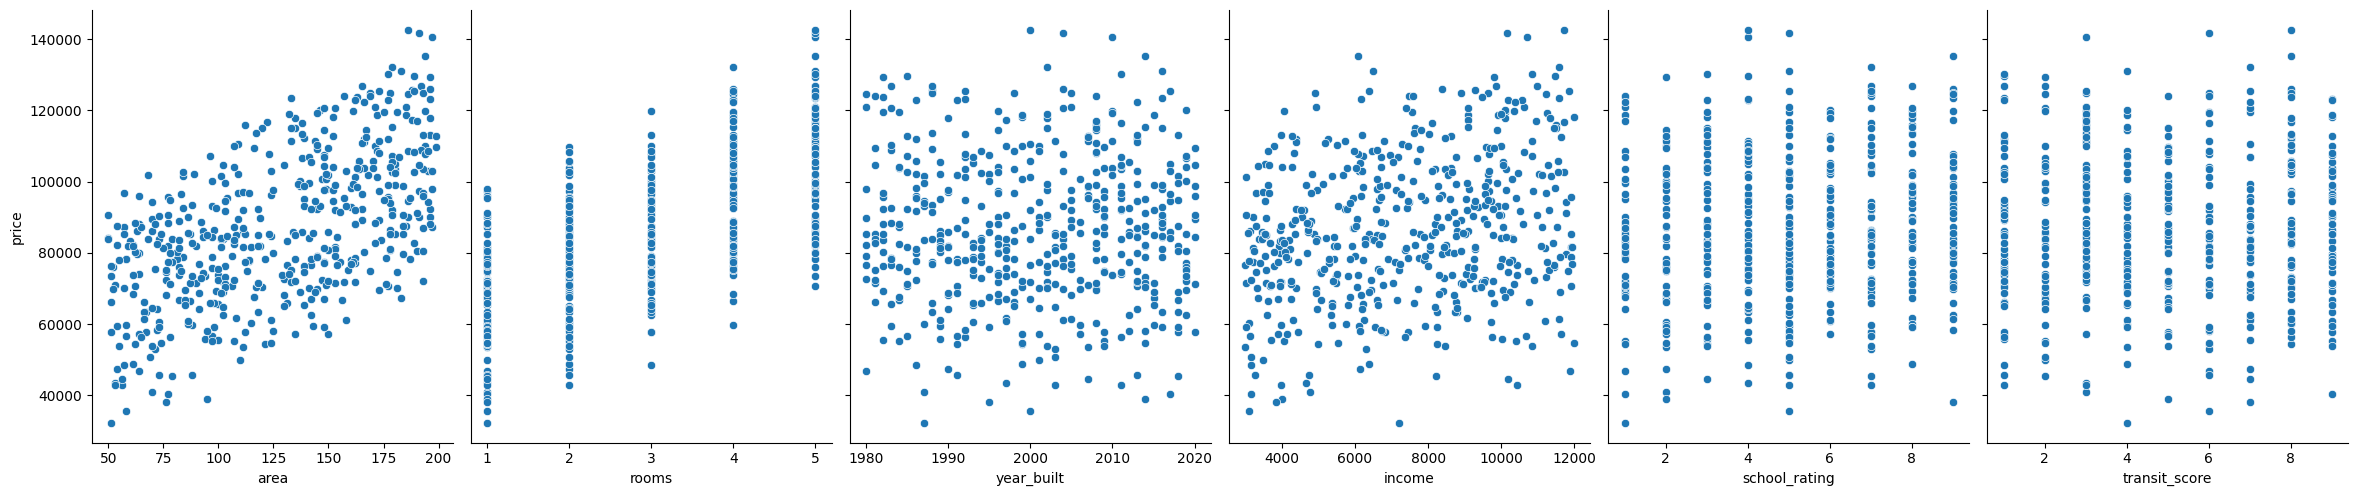

In [8]:
sns.pairplot(data, x_vars=['area', 'rooms', 'year_built', 'income', 'school_rating', 'transit_score'], y_vars='price', height=5, aspect=0.8, kind='scatter')
plt.show()

In [9]:
# 모델 1: 선형 회귀
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_y_pred = linear_model.predict(X_test)
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_y_pred))
linear_r2 = r2_score(y_test, linear_y_pred)

In [10]:
# 모델 2: 랜덤 포레스트 회귀 RandomForestRegression()
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred))
rf_r2 = r2_score(y_test, rf_y_pred)

Linear Regression RMSE: 5805.05, R²: 0.93
Random Forest Regression RMSE: 7272.56, R²: 0.89


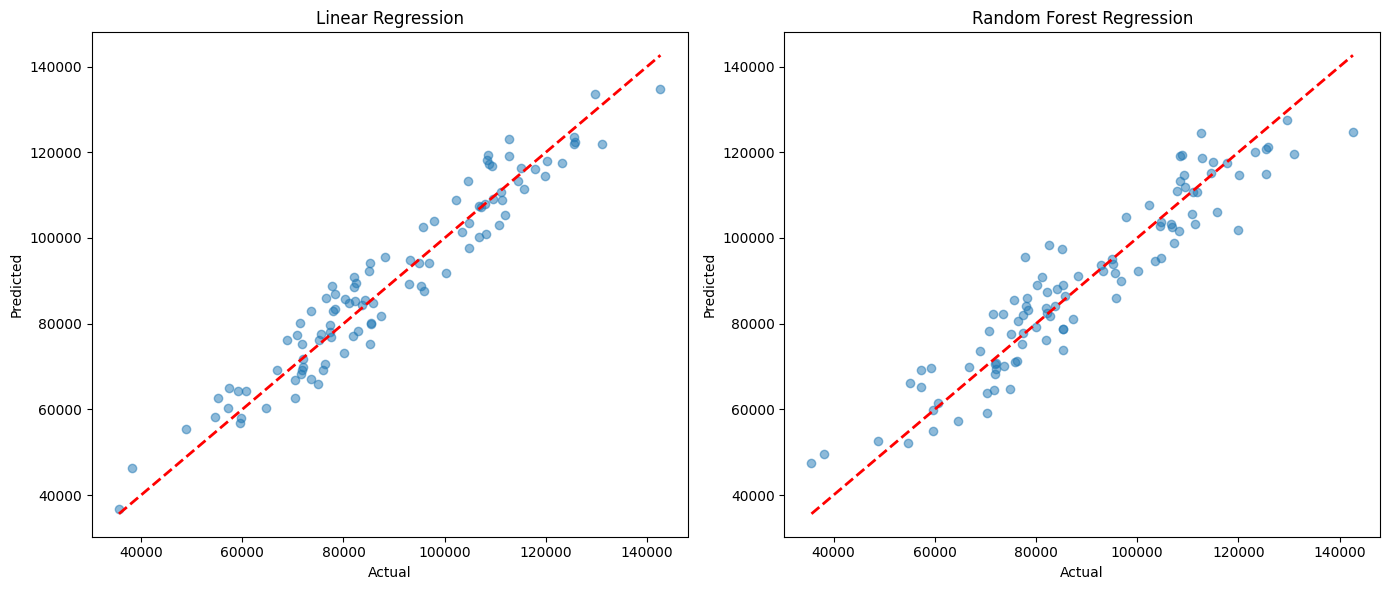

In [11]:
print(f'Linear Regression RMSE: {linear_rmse:.2f}, R²: {linear_r2:.2f}')
print(f'Random Forest Regression RMSE: {rf_rmse:.2f}, R²: {rf_r2:.2f}')

# 그래프 출력
plt.figure(figsize=(14, 6))

# 선형 회귀 결과
plt.subplot(1, 2, 1)
plt.scatter(y_test, linear_y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')

# 랜덤 포레스트 회귀 결과
plt.subplot(1, 2, 2)
plt.scatter(y_test, rf_y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regression')

plt.tight_layout()
plt.show()